In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
amazon_df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

amazon_df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
amazon_df.tail()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing
2443650,2828593,B08P3W9B3T,RIDEX CJ223 Motorcycle Motorbike Jacket Armour...,4.5,34,53.99,False,0,Motorbike Clothing


In [5]:
amazon_df.shape

(2443651, 9)

In [6]:
# Retrieving the unique data types present in the dataframe columns

list(set(amazon_df.dtypes.tolist()))

[dtype('float64'), dtype('bool'), dtype('int64'), dtype('O')]

In [7]:
# Finding the numerical columns

numerical_columns = amazon_df.select_dtypes("number").columns
numerical_columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [8]:
# Finding column names with object data types from the dataframe
categorical_table = amazon_df.select_dtypes("object").columns

categorical_table

Index(['asin', 'title', 'category'], dtype='object')

In [9]:
# Checking missing values

amazon_df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [10]:
# Identifying columns in the dataframe where over 80% of the values are missing
amazon_df.columns[amazon_df.isnull().mean() > 0.8]

Index([], dtype='object')

**Part 1: Understanding Product Categories**

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. Frequency Tables:
- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories?



In [11]:
# Frequency table for 'category'
frequency_table = amazon_df['category'].value_counts()

# Calculating the proportion of each unique value in the 'category'
proportion_table = amazon_df['category'].value_counts(normalize=True)

frequency_table, proportion_table

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Alexa Built-In Devices                    0.000044
 Motorbike Chassis       

In [12]:
# Creating a crosstab table for the 'category' column, counting occurrences for each unique value
my_table = pd.crosstab(index = amazon_df["category"],  # Make a crosstab
                              columns="count")      # Name the count column
my_table

col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [13]:
unique_category = amazon_df["category"].unique()
unique_category

array(['Hi-Fi Speakers', 'CD, Disc & Tape Players', 'Wearable Technology',
       'Light Bulbs', 'Bathroom Lighting',
       'Heating, Cooling & Air Quality', 'Coffee & Espresso Machines',
       'Lab & Scientific Products', 'Smart Speakers',
       'Motorbike Clothing', 'Motorbike Accessories',
       'Motorbike Batteries', 'Motorbike Boots & Luggage',
       'Motorbike Chassis', 'Handmade Home & Kitchen Products',
       'Hardware', 'Storage & Home Organisation',
       'Fireplaces, Stoves & Accessories', 'PC Gaming Accessories',
       'USB Gadgets', 'Blank Media Cases & Wallets', 'Car & Motorbike',
       'Boys', 'Sports & Outdoors', 'Microphones', 'String Instruments',
       'Karaoke Equipment', 'PA & Stage',
       'General Music-Making Accessories', 'Wind Instruments',
       'Handmade Gifts', 'Fragrances', 'Calendars & Personal Organisers',
       'Furniture & Lighting', 'Computer Printers', 'Ski Goggles',
       'Snowboards', 'Skiing Poles', 'Downhill Ski Boots',
       'Hiki

2. Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

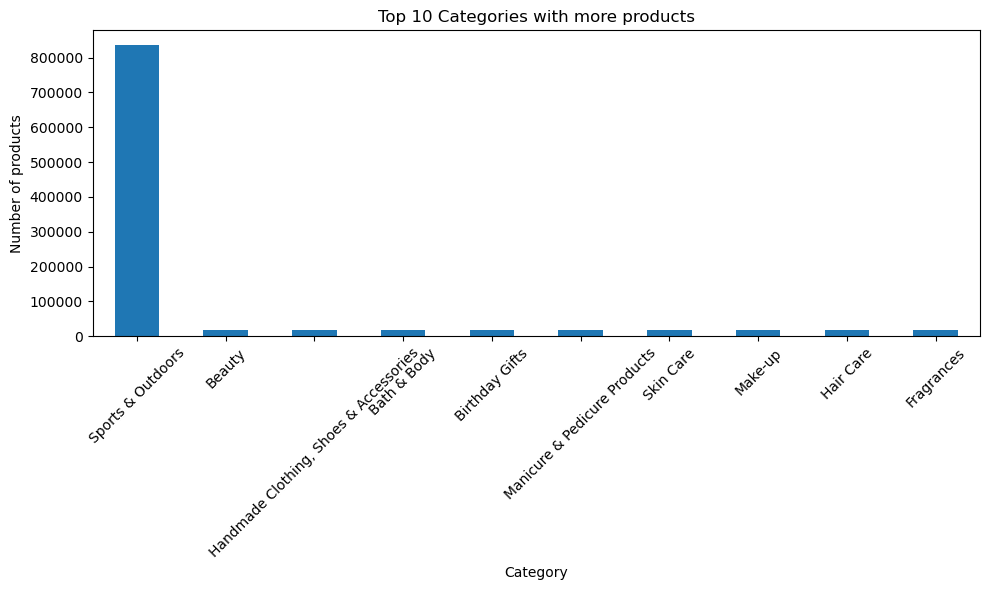

In [14]:
# Top 10 categories
top_categories = amazon_df['category'].value_counts().head(10)

# Bar chart
top_categories.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Categories with more products')
plt.ylabel('Number of products')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


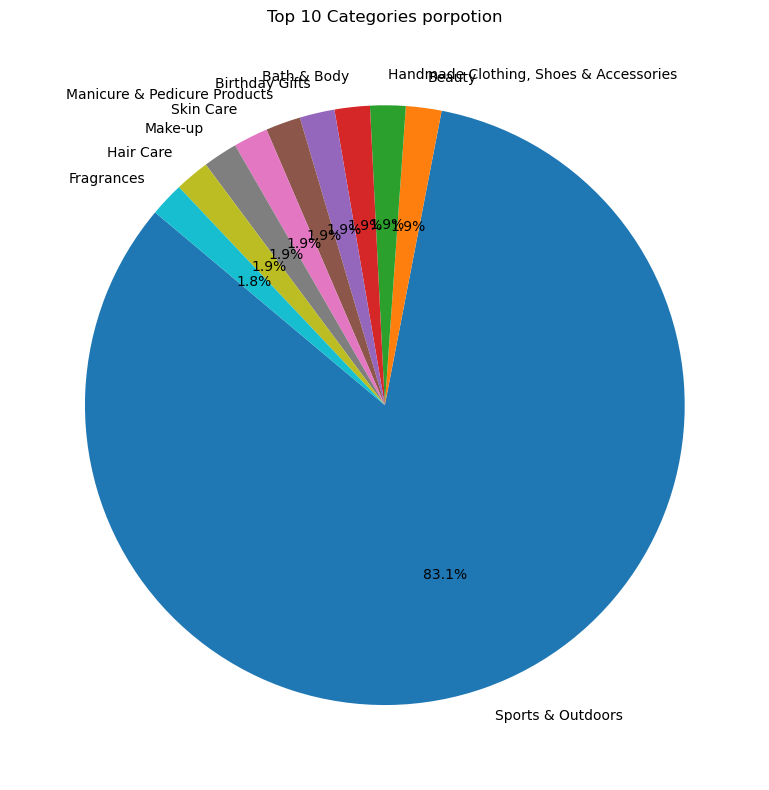

In [15]:
# Pie chart
top_categories.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), startangle=140)
plt.title('Top 10 Categories porpotion')
plt.ylabel('')
plt.tight_layout()
plt.show()


**Answer – Part 1: Visualization
From both the frequency table and the bar chart, it's clear that Sports & Outdoors stands out as the dominant category, with significantly more products than any other. While the frequency table already highlighted this difference numerically, the visualizations—especially the bar and pie charts—make the dominance much more apparent and easier to interpret at a glance.**

_______

**Part 2: Delving into Product Pricing**


Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

**1. Measures of Centrality:**

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [16]:
price_column = amazon_df['price'].describe()
price_column

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [17]:
# Calculating the mean, the median and the mode
avg_price = amazon_df["price"].mean().round(2)
print("The mean is: £", avg_price)

median_price = amazon_df["price"].median()
print("The median is: £", median_price)

mode_price = amazon_df["price"].mode()
print("The mode is: £", mode_price.iloc[0])



The mean is: £ 89.24
The median is: £ 19.09
The mode is: £ 9.99


To explore how products are priced on Amazon UK, I calculated the main measures of centrality for product prices:
•	Mean (Average): £89.24
•	Median: £19.09
•	Mode: £9.99
Interpretation:
There’s a significant gap between the mean and the median, suggesting a right-skewed distribution — a small number of high-priced items are pulling the average up. Most products are actually priced well below the mean.
The mode, at £9.99, shows that this is the most frequently used price point.
So while the average product appears expensive, the typical customer experience is dominated by lower-priced items, especially around the £10 mark.

**2. Measures of Dispersion:**

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

In [18]:
# Variance
variance_price = amazon_df['price'].var()
print("The variance of the prices is:", round(variance_price, 2))

# Standard deviation
stan_dev = amazon_df['price'].std()
print("The standard deviation of the prices is:", round(stan_dev, 2))

# Range (max - min)
price_max = amazon_df['price'].max()
price_min = amazon_df['price'].min()
range_ = price_max - price_min
print("The price range is: £", round(range_, 2))

# IQR
q1 = amazon_df['price'].quantile(0.25)
q3 = amazon_df['price'].quantile(0.75)
iqr = q3 - q1
print("The interquartile range (IQR) is:", round(iqr, 2))


The variance of the prices is: 119445.49
The standard deviation of the prices is: 345.61
The price range is: £ 100000.0
The interquartile range (IQR) is: 36.0


The variance of the prices is high, indicating that product prices are widely spread out and that there is substantial variation in the dataset.

The standard deviation, which was £345.61, confirms this variation: on average, product prices deviate significantly from the mean (£89.24), reinforcing the idea that some high-priced items are skewing the distribution.

The range, calculated as the difference between the highest and lowest prices, shows a very wide pricing spectrum which highlights the presence of both very low-cost and high-end products.

The interquartile range (IQR), which was £36, tells us that the middle 50% of products are clustered within this price interval. This suggests that although there are outliers, the majority of products are priced within a relatively narrow and accessible band.

**3. Visualizations:**

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

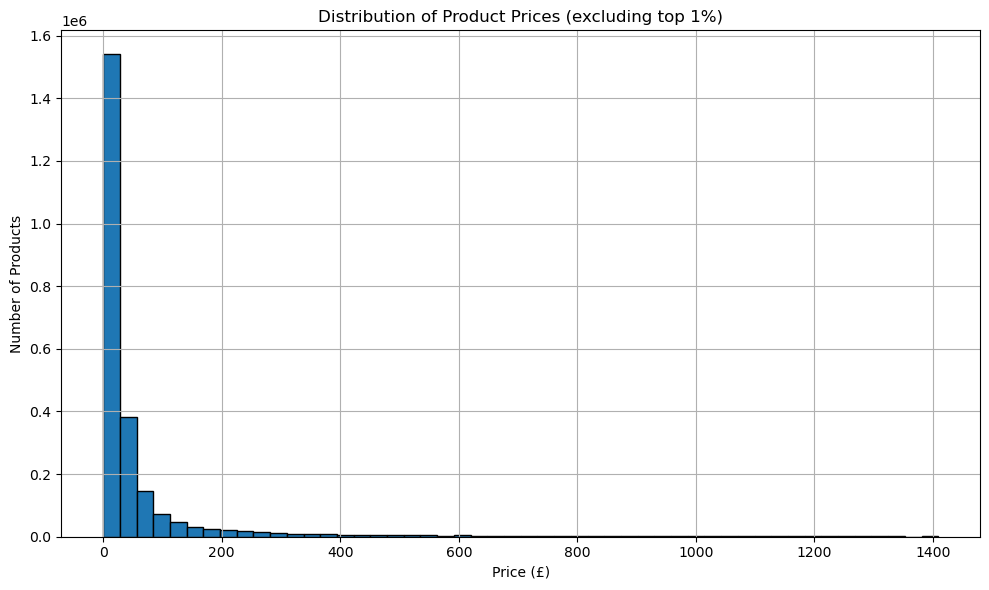

In [ ]:
# creating an histogtam

# Exclude the top 1% prices (focus on the body of the distribution)
filtered_prices = amazon_df[amazon_df['price'] < amazon_df['price'].quantile(0.99)]

plt.figure(figsize=(10,6))
plt.hist(filtered_prices['price'], bins=50, edgecolor='black')
plt.title('Distribution of Product Prices (excluding top 1%)')
plt.xlabel('Price (£)')
plt.ylabel('Number of Products')
plt.grid(True)
plt.tight_layout()
plt.show()


# as it was hard to read the original chart, I excluded the top 1%, so we could see a better distribution along the x axis.

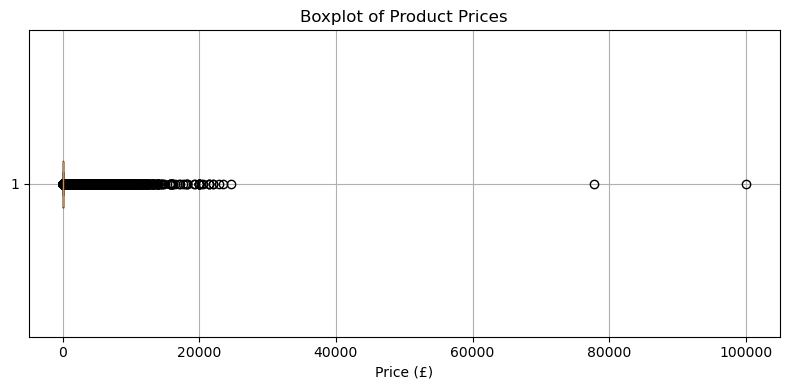

In [22]:
plt.figure(figsize=(8,4))
plt.boxplot(amazon_df['price'], vert=False)
plt.title('Boxplot of Product Prices')
plt.xlabel('Price (£)')
plt.grid(True)
plt.tight_layout()
plt.show()


With the histogram we could see that there is a great amount of products that fall in the left part of the chart, meaning that their prices are lower. We could see that the histogram had a long tail, where the outliers can be found. With the boxplot this stays completly clean, as the outliers are much more visible.

________

**Part 3: Unpacking Product Ratings**

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. Measures of Centrality:
Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?


In [25]:
rating_values = amazon_df["stars"].value_counts()
rating_values

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

In [ ]:
# Calculating the mean, the median and the mode
avg_stars = amazon_df["stars"].mean().round(2)
print("The mean is:", avg_stars)

median_stars = amazon_df["stars"].median()
print("The median is:", median_stars)

mode_stars = amazon_df["stars"].mode()
print("The mode is:", mode_stars.iloc[0])

# with this result we can see that median and mode are equal (0.0). 
# This means that there is a pattern as most of the products has a racking of 0

The mean is: 2.15
The median is: 0.0
The mode is: 0.0


2. Measures of Dispersion:
Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

In [34]:
# Variance
variance_stars = amazon_df['stars'].var()
print("The variance of the rancking  is:", round(variance_stars, 2))

# Standard deviation
stan_dev_stars = amazon_df['stars'].std()
print("The standard deviation of the rancking is:", round(stan_dev_stars, 2))

# Range (max - min)
max_stars = amazon_df['stars'].max()
min_stars = amazon_df['stars'].min()
range_stars = max_stars - min_stars
print("The rancking range is: ", round(range_stars, 2))

# IQR
q1_stars = amazon_df['stars'].quantile(0.25)
q3_stars = amazon_df['stars'].quantile(0.75)
iqr_stars = q3_stars - q1_stars
print("The interquartile range (IQR) is:", round(iqr_stars, 2))

The variance of the rancking  is: 4.82
The standard deviation of the rancking is: 2.19
The rancking range is:  5.0
The interquartile range (IQR) is: 4.4


3. Shape of the Distribution:
Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [35]:
import scipy

In [ ]:
from scipy.stats import skew

print(skew(amazon_df['stars']))

# skew = 0.081 means that the tail is on the right, so it has more smaller values

0.08120730776283354


In [ ]:
from scipy.stats import kurtosis

kurtosis(amazon_df["stars"], fisher=True)

# kurtosis = -1.926, this means that the distribution has less tails

-1.926004642549839

Answer to exercise 3: This suggests that while most ratings are concentrated around the average, there are also more extreme values than would typically be expected.

4. Visualizations:
Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

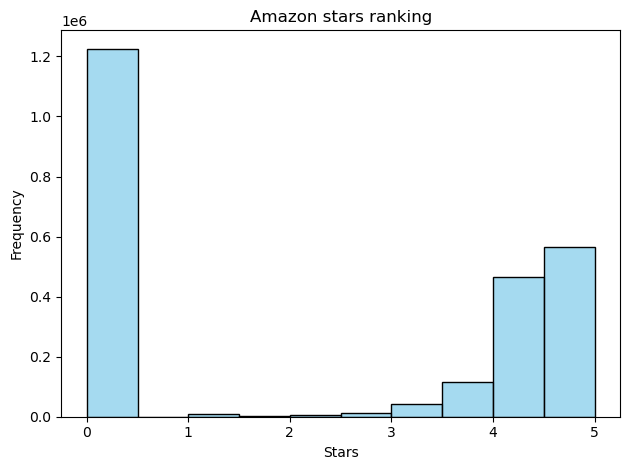

In [45]:
stars_ranking = amazon_df["stars"].dropna().astype(float)

sns.histplot(stars_ranking, bins=10, kde=False, color="skyblue")
plt.title("Amazon stars ranking")
plt.xlabel("Stars")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

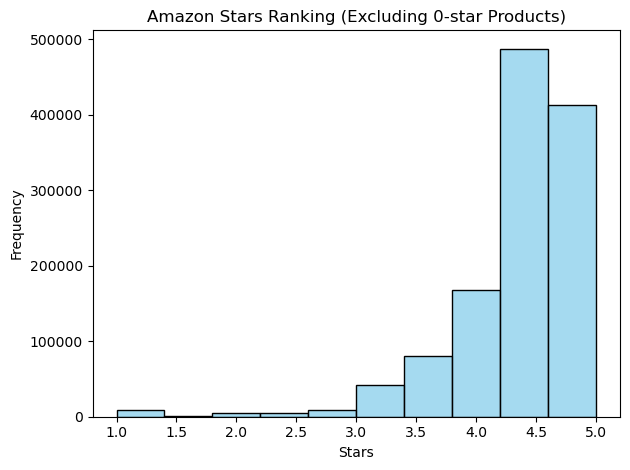

In [46]:
# removing the 0 from the ranking

stars = amazon_df["stars"]
stars_valid = stars[(stars > 0) & (stars <= 5)]

sns.histplot(stars_valid, bins=10, kde=False, color="skyblue")
plt.title("Amazon Stars Ranking (Excluding 0-star Products)")
plt.xlabel("Stars")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Answer to exercise 4: A large number of products have a rating of 0, which likely indicates that they haven’t been reviewed yet. Including these values distorts the histogram, making it harder to see how rated products are actually distributed. By excluding unrated items, we get a clearer picture of customer feedback patterns, typically showing a concentration of ratings between 4 and 5 stars.